In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

from sklearn.model_selection import train_test_split

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.utils.extmath import density

from sklearn import metrics
import model
from model import Model
import health_data
from health_data import DepressionHealthData
import imp


#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)


In [96]:
df = pd.read_csv("./healthdata/merged.csv", index_col=0)
# dhd = DepressionHealthData()
# dhd.prepare_data()
# df = dhd.df

In [97]:
sum = df["SUM"]
sum[sum < 9] = 0
sum[sum >= 9] = 1
df.drop(['SEQN','DPQ010', 'DPQ020',	'DPQ030',	'DPQ040',	'DPQ050',	'DPQ060',	'DPQ070',	'DPQ080',	'DPQ090', "DPQ100"], axis=1, inplace=True)
df = df.select_dtypes(exclude=['object'])
df.describe()

/var/folders/m7/7mcwkh2x2rx7v7p1s3m7pqlw0000gn/T/ipykernel_52898/2305646303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum[sum < 9] = 0
/var/folders/m7/7mcwkh2x2rx7v7p1s3m7pqlw0000gn/T/ipykernel_52898/2305646303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum[sum >= 9] = 1


,SUM,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,ACD011A,ACD040,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,ALQ151,ALQ160,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ056,BPD058,BPQ059,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,CBD070,CBD090,CBD110,CBD120,CBD130,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ590,HSAQUEX,CSQ010,CSQ020,CSQ030,CSQ040,CSQ080,CSQ090A,CSQ090B,CSQ090C,CSQ090D,CSQ100,CSQ110,CSQ160,CSQ180,CSQ190,CSQ200,CSQ202,CSQ204,CSQ210,CSQ220,CSQ240,CSQ250,CSQ260,AUQ136,AUQ138,CDQ001,CDQ010,DIQ010,DIQ160,DIQ170,DIQ172,DIQ175A,DIQ180,DIQ050,DIQ070,DBQ700,DBQ197,DBQ223A,DBQ223B,DBQ229,DBQ235A,DBQ235B,DBQ235C,DBQ301,DBQ330,DBD895,DBD900,DBD905,DBD910,CBQ596,CBQ505,CBQ535,CBQ540,CBQ545,CBQ550,CBQ552,CBQ580,CBQ585,CBQ590,DED031,DEQ034A,DEQ034C,DEQ034D,DEQ038G,DEQ038Q,DED120,DED125,DLQ010,DLQ020,DLQ040,DLQ050,DLQ060,DLQ080,DUQ200,DUQ210,DUQ211,DUQ220Q,DUQ220U,DUQ240,DUQ370,DUQ430,FSD032A,FSD032B,FSD032C,FSD041,FSD061,FSD071,FSD081,FSD032D,FSD032E,FSD032F,FSDHH,FSDAD,FSDCH,FSD151,FSQ165,FSQ012,FSD012N,FSD230,FSD225,FSQ235,FSQ162,HEQ010,HEQ030,HIQ011,HIQ031A,HIQ031B,HIQ270,HIQ210,HOD050,HOQ065,HUQ010,HUQ020,HUQ030,HUQ041,HUQ051,HUQ071,HUQ090,IMQ011,IMQ020,IMQ040,IMQ070,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,INQ244,IND247,MCQ010,MCQ053,MCQ070,MCQ080,MCQ082,MCQ084,MCQ086,MCQ092,MCQ160A,MCQ180A,MCQ195,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160G,MCQ160M,MCQ160K,MCQ160L,MCQ160O,MCQ203,MCQ220,MCQ300A,MCQ300B,MCQ300C,MCQ365A,MCQ365B,MCQ365C,MCQ365D,MCQ370A,MCQ370B,MCQ370C,MCQ370D,MCQ380,OCD150,OCQ180,OCQ260,OCD270,OCQ380,OCD390G,OCD395,OHQ030,OHQ033,OHQ770,OHQ610,OHQ612,OHQ614,OHQ620,OHQ640,OHQ680,OHQ835,OHQ845,OHQ850,OHQ855,OHQ860,OHQ865,OHQ870,OHQ875,OHQ880,OHQ885,OHQ895,OHQ900,OSQ010A,OSQ010B,OSQ010C,OSQ080,OSQ060,OSQ130,OSQ150,OSQ170,OSQ200,PFQ049,PFQ051,PFQ054,PFQ057,PFQ059,PFQ061A,PFQ061B,PFQ061C,PFQ061D,PFQ061E,PFQ061F,PFQ061G,PFQ061H,PFQ061I,PFQ061J,PFQ061K,PFQ061L,PFQ061M,PFQ061N,PFQ061O,PFQ061P,PFQ061Q,PFQ061R,PFQ061S,PFQ061T,PFQ063A,PFQ090,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,PAD645,PAQ650,PAQ655,PAD660,PAQ665,PAQ670,PAD675,PAD680,PAQ710,PAQ715,PAAQUEX,PUQ100,PUQ110,RHQ010,RHQ031,RHD043,RHQ060,RHQ074,RHQ076,RHQ078,RHQ131,RHQ160,RHQ162,RHQ166,RHQ169,RHQ172,RHQ171,RHD180,RHD190,RHD280,RHQ305,RHQ420,RHQ540,RXQ510,RXQ515,RXQ520,RXQ525G,RXD530,SLD010H,SLQ050,SLQ060,SMQ020,SMD030,SMQ040,SMQ050Q,SMQ050U,SMD055,SMD057,SMD641,SMD650,SMD093,SMQ670,SMAQUEX2,SMD460,SMD470,SMQ856,SMQ858,SMQ860,SMQ862,SMQ866,SMQ870,SMQ872,SMQ874,SMQ876,SMQ878,SMQ880,SMAQUEX.x,SMQ681,SMQ690A,SMQ710,SMQ720,SMQ725,SMQ851,SMQ863,SMDANY,SMAQUEX.y,SXD021,SXQ800,SXQ803,SXQ806,SXQ809,SXQ700,SXQ703,SXQ706,SXQ709,SXD031,SXD171,SXD510,SXQ824,SXQ827,SXD633,SXQ636,SXQ639,SXD642,SXD621,SXQ624,SXQ627,SXD630,SXQ645,SXQ648,SXQ610,SXQ251,SXD101,SXD450,SXQ724,SXQ727,SXQ753,SXQ260,SXQ265,SXQ270,SXQ272,SXQ280,SXQ292,SXQ294,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080D,WHD110,WHD120,WHD130,WHD140,WHQ150
count,5393.000000,5393.0,5393.0,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5389.000000,1434.000000,5075.000000,5075.000000,1104.000000,5393.000000,5393.000000,5393.000000,5341.000000,5341.000000,5341.000000,5393.000000,5393.0,5393.000000,4534.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000,5243.000000,5243.000000,5319.000000,2758.000000,5393.000000,5393.000000,5393.000000,5393.000000,5333.000000,5340.000000,5000.000000,3545.0,1236.000000,5390.000000,1609.000000,4465.000000,3588.000000,3591.000000,3590.000000,1464.000000,4463.000000,1864.000000,5393.000000,1941.000000,1932.000000,

In [98]:
def detest() -> Model:
   demographics_feature = ["RIAGENDR", "RIDRETH3", "DMQMILIZ", "DMDMARTL", "RIDEXPRG", "DMDHHSIZ", "DMDFMSIZ"]
   blood_pressure = ["BPQ060", "BPQ090D", "BPQ100D"]
   card_health = ["CDQ001"]
   consumer_behavior = ["CBD130"]
   #creatine_kinase = ["CKQ010", "CKQ020", "CKQ040", "CKQ070Q"]
   current_health = ["HSQ571", "HSQ590"]
   dermatology = ["DED031", "DEQ034A", "DEQ034C", "DEQ038G", "DED120"]
   diabetes = ["DIQ010", "DIQ070"]
   diet_behavior_nutrition = ["DBQ010", "DBD055", "DBQ700", "DBQ197", "DBQ301", "DBQ330", "DBQ360", "DBD381", "DBQ390", "CBQ550", "CBQ585", "DBD895"]
   disablity = ["DLQ010", "DLQ020", "DLQ040", "DLQ050", "DLQ060", "DLQ080"]
   drug_use = ["DUQ200", "DUQ219", "DUQ240", "DUQ272", "DUQ320", "DUQ352", "DUQ370", "DUQ410", "DUQ430"]
   food = ["FSD032B", "FSD071", "FSD102", "FSD032D", "FSD146", "FSDHH", "FSD151", "FSQ165", "FSQ162", "FSD650ZC"]
   health_insurance = ["HIQ210"]
   home = ["HOD050", "HOQ065"]
   hospital_utilization = ["HUQ051", "HUQ030", "HUQ071", "HUQ090"]
   income = ["INQ020", "INQ012", "INQ030", "INQ060", "INQ080", "INQ090", "INQ132", "INQ140", "INQ150", "IND235"]
   # kidney = ["KIQ022", "KIQ026", "KIQ005", "KIQ005"]
   #top25 = ["RXDCOUNT", "PFQ063B", "SLQ050", "HSD010", "SLD010H", "WHQ150", "WHD010", "PAQ710", "INDFMMPI", "CDQ010", "DMDHRAGE", "INDFMPIR", "CBD070", "CBD110", "SMD030", "SXD031", "IND235", "CBD120", "ALQ130"]
   #top50 = ["ALQ120Q", "WHD050", "DMDEDUC2", "DMDEDUC3", "WHD110", "DLQ050", "MCQ300C", "HUQ051", "RHD190", "CBQ580", "RIDAGEYR", "SMQ040", "OHQ680", "HOD050", "RHQ560Q", "WHD020", "HUQ010", "PAD680", "MCQ092", "DIQ070", "PFQ063A"]
   #top75 = ["DBD895", "PFQ063D", "OHQ870", "SXD101", "SXD171", "OHQ030", "DMDHRGND", "RHQ420", "PAD675", "DED031", "DED120", "DMDHRMAR", "BPD035", "BPQ050A", "BPQ050A", "PFQ061S", "OCD270", "OHQ875"]
   #top100 = ["OCQ180", "DBD900", "CBQ585", "FSD032B", "DMDHSEDU", "RHQ060", "MCQ370A", "DBQ235C", "OHQ033", "SXD171", "MCQ365C", "CDQ008", "DMDHHSZB", "SXQ610", "MCQ380", "PAQ715", "RHQ160", "INDFMIN2", "DBQ235B"]

   final_features = [
      *demographics_feature, *blood_pressure, *card_health, *consumer_behavior, *current_health, 
      *dermatology, *diabetes, *diet_behavior_nutrition, *disablity, *drug_use, *food, 
      *health_insurance, *home, *hospital_utilization, *income]
   # final_features = [*diet_behavior_nutrition, *disablity, *drug_use, *food, *home]
   # pre_features = [*top25]
   # final_not_one_hot_features = [x[1:] for x in pre_features if x[0] == '@']
   # final_one_hot_features = [x for x in pre_features if x[0] != '@']
   # final_features = [*final_not_one_hot_features, *final_one_hot_features]
   detest = df[final_features].copy()
   detest = pd.get_dummies(detest, columns=final_features)
   #detest = detest.fillna(0)
   detest.insert(0, 'SUM', sum)
   from model import Model
   m = Model(detest)
   m.init_data_set()
   return m

In [99]:
# def range_encoding(df: DataFrame, encode_name: str, start: float, end: float, step: float, special: dict):
#   for interval in range(start, end, step):
#     df.insert(df.columns.get_loc(encode_name), f"{encode_name}_{interval}_{interval + step}", df[encode_name].apply(lambda x: 1 if x >= interval and x < interval + step else 0))
#   for sp in special:
#     df.insert(df.columns.get_loc(encode_name), f"{encode_name}_{sp}", df[encode_name].apply(lambda x: 1 if str(x).lower() == str(sp).lower() or (str(x).lower() != str(np.NaN).lower() and str(sp).lower() != str(np.NaN).lower() and str(int(x)) == str(int(sp))) else 0))
#   df.drop([encode_name], inplace=True, axis=1)

def range_encoding(df: DataFrame, encode_name: str, start: float, end: float, step: float, special: list):
  # for interval in range(start, end, step):
  #   df.insert(df.columns.get_loc(encode_name), f"{encode_name}_{interval}_{interval + step}", df[encode_name].apply(lambda x: 1 if x >= interval and x < interval + step else 0))
  for sp in special:
    df.insert(df.columns.get_loc(encode_name), f"{encode_name}_{sp}", df[encode_name].apply(lambda x: 1 if str(x).lower() == str(sp).lower() or (str(x).lower() != str(np.NaN).lower() and str(sp).lower() != str(np.NaN).lower() and str(int(x)) == str(int(sp))) else 0))
  df.insert(df.columns.get_loc(encode_name), f"{encode_name}_RE", df[encode_name].apply(lambda x: 0 if any(str(x).lower() in str(sp).lower() or (not str(x).lower() in str(np.NaN).lower() and not str(sp).lower() in str(np.NaN).lower() and str(int(x)) in str(int(sp))) for sp in special) else x))
  df.drop([encode_name], inplace=True, axis=1)


In [100]:
# top25 = ["RXDCOUNT", "PFQ063B", "SLQ050", "HSD010", "SLD010H", "WTINT2YR", "WHQ150", "WHD010", "PAQ710", "INDFMMPI", "CDQ010", "MDHRAGE", "INDFMPIR", "CBD070", "CBD110", "SMD030", "SXD031", "IND235", "CBD120", "ALQ130"]
# # top25onehot = ["PFQ063B", "SLQ050", "HSD010", "SXQ709", "IND235", "ALQ101", "DMDEDUC2", "DMDEDUC3", "DLQ050", "MCQ300C", "HUQ051", "CBQ580", "SMQ040", "HUQ010", "MCQ092", "PFQ063A", "PFQ063D"]
# top25onehot = ["SLQ050", "HSD010", "SXQ709", "IND235", "ALQ101", "DLQ050", "MCQ300C", "HUQ051", "CBQ580", "SMQ040", "HUQ010", "MCQ092", "PFQ063A"]
# NaNDict = ["NaN"]
# RefusedIDK1 = ["7", "9"]
# RefusedIDK2 = ["77", "99"]
# RefusedIDK3 = ["777", "999"]
# RefusedIDK4 = ["7777", "9999"]
# RefusedIDK5 = ["77777", "99999"]
# RefusedIDK6 = ["777777", "999999"]
# RXDCOUNT = ["RXDCOUNT", 1, 23, 2, NaNDict]
# SLD010H = ["SLD010H", 2, 12, 2, [*NaNDict, *RefusedIDK2]]
# WHD010 = ["WHD010", 48, 81, 5, [*NaNDict, *RefusedIDK4]]
# df[df["PAQ710"] == 8] = 0
# PAQ710 = ["PAQ710", 0, 5, 1, [*NaNDict, *RefusedIDK2]]
# INDFMMPI = ["INDFMMPI", 0, 5, 1, [*NaNDict]]
# CBD110 = ["CBD110", 0, 2000, 200, [*NaNDict, *RefusedIDK6]]
# SMD030 = ["SMD030", 0, 64, 10, [*NaNDict, *RefusedIDK3, "80"]]
# SXD031 = ["SXD031", 9, 60, 5, [*NaNDict, *RefusedIDK2]]
# CBD070 = ["CBD070", 0, 4285, 500, [*NaNDict, *RefusedIDK6]]
# CBD090 = ["CBD090", 0, 1542, 200, [*NaNDict, *RefusedIDK6]]
# ALQ130 = ["ALQ130", 1, 25, 5, [*NaNDict, *RefusedIDK3]]
# ALQ120Q = ["ALQ120Q", 0, 365, 30, [*NaNDict, *RefusedIDK3]]
# WHD050 = ["WHD050", 75, 559, 20, [*NaNDict, *RefusedIDK4]]
# RHD190 = ["RHD190", 14, 45, 5, [*NaNDict, *RefusedIDK3]]
# RIDAGEYR = ["RIDAGEYR", 0, 80, 5, [*NaNDict]]
# HOD050 = ["HOD050", 1, 13, 2, [*NaNDict, *RefusedIDK3]]
# WHD020 = ["WHD020", 75, 493, 20, [*NaNDict, *RefusedIDK4]]
# DBD895 = ["DBD895", 1, 27, 3, [*NaNDict, *RefusedIDK4, "5555"]]
# OHQ870 = ["OHQ870", 0, 7, 2, [*NaNDict, *RefusedIDK2]]


# # top25_range_encoding = [RXDCOUNT, SLD010H, WHD010, PAQ710, INDFMMPI, CBD110, SMD030, SXD031, CBD070, CBD090, ALQ130, ALQ120Q, WHD050, RIDAGEYR, RHD190, HOD050, WHD020, DBD895, OHQ870]
# top25_range_encoding = [SLD010H, WHD010, PAQ710, INDFMMPI, CBD110, SMD030, SXD031, CBD070, CBD090, ALQ130, ALQ120Q, WHD050, RHD190, HOD050, WHD020, DBD895, OHQ870]
# top25_range_encoding_columns = [*[col[0] for col in top25_range_encoding], *top25onehot]
# df_range_encoding = df[top25_range_encoding_columns].copy()
# df_range_encoding = pd.get_dummies(df_range_encoding, columns=top25onehot)
# for re in top25_range_encoding:
#   print(f"encoding {re[0]}, {re[1]}, {re[2]}, {re[3]}, {re[4]}")
#   range_encoding(df_range_encoding, re[0], re[1], re[2], re[3], re[4])

# df_range_encoding.insert(0, 'SUM', sum)

In [101]:
top25 = ["RXDCOUNT", "PFQ063B", "SLQ050", "HSD010", "SLD010H", "WTINT2YR", "WHQ150", "WHD010", "PAQ710", "INDFMMPI", "CDQ010", "MDHRAGE", "INDFMPIR", "CBD070", "CBD110", "SMD030", "SXD031", "IND235", "CBD120", "ALQ130"]
# top25onehot = ["PFQ063B", "SLQ050", "HSD010", "SXQ709", "IND235", "ALQ101", "DMDEDUC2", "DMDEDUC3", "DLQ050", "MCQ300C", "HUQ051", "CBQ580", "SMQ040", "HUQ010", "MCQ092", "PFQ063A", "PFQ063D"]
top25onehot = ["SLQ050", "HSD010", "SXQ709", "IND235", "ALQ101", "DLQ050", "MCQ300C", "HUQ051", "CBQ580", "SMQ040", "HUQ010", "MCQ092", "PFQ063A"]
NaNDict = ["NaN"]
RefusedIDK1 = ["7", "9"]
RefusedIDK2 = ["77", "99"]
RefusedIDK3 = ["777", "999"]
RefusedIDK4 = ["7777", "9999"]
RefusedIDK5 = ["77777", "99999"]
RefusedIDK6 = ["777777", "999999"]
RXDCOUNT = ["RXDCOUNT", 1, 23, 2, NaNDict]
SLD010H = ["SLD010H", 2, 12, 2, [*NaNDict, *RefusedIDK2]]
WHD010 = ["WHD010", 48, 81, 5, [*NaNDict, *RefusedIDK4]]
df[df["PAQ710"] == 8] = 0
PAQ710 = ["PAQ710", 0, 5, 1, [*NaNDict, *RefusedIDK2]]
INDFMMPI = ["INDFMMPI", 0, 5, 1, [*NaNDict]]
CBD110 = ["CBD110", 0, 2000, 200, [*NaNDict, *RefusedIDK6]]
SMD030 = ["SMD030", 0, 64, 10, [*NaNDict, *RefusedIDK3, "80"]]
SXD031 = ["SXD031", 9, 60, 5, [*NaNDict, *RefusedIDK2]]
CBD070 = ["CBD070", 0, 4285, 500, [*NaNDict, *RefusedIDK6]]
CBD090 = ["CBD090", 0, 1542, 200, [*NaNDict, *RefusedIDK6]]
ALQ130 = ["ALQ130", 1, 25, 5, [*NaNDict, *RefusedIDK3]]
ALQ120Q = ["ALQ120Q", 0, 365, 30, [*NaNDict, *RefusedIDK3]]
WHD050 = ["WHD050", 75, 559, 20, [*NaNDict, *RefusedIDK4]]
RHD190 = ["RHD190", 14, 45, 5, [*NaNDict, *RefusedIDK3]]
RIDAGEYR = ["RIDAGEYR", 0, 80, 5, [*NaNDict]]
HOD050 = ["HOD050", 1, 13, 2, [*NaNDict, *RefusedIDK3]]
WHD020 = ["WHD020", 75, 493, 20, [*NaNDict, *RefusedIDK4]]
DBD895 = ["DBD895", 1, 27, 3, [*NaNDict, *RefusedIDK4, "5555"]]
OHQ870 = ["OHQ870", 0, 7, 2, [*NaNDict, *RefusedIDK2]]


# top25_range_encoding = [RXDCOUNT, SLD010H, WHD010, PAQ710, INDFMMPI, CBD110, SMD030, SXD031, CBD070, CBD090, ALQ130, ALQ120Q, WHD050, RIDAGEYR, RHD190, HOD050, WHD020, DBD895, OHQ870]
top25_range_encoding = [SLD010H, WHD010, PAQ710, INDFMMPI, CBD110, SMD030, SXD031, CBD070, CBD090, ALQ130, ALQ120Q, WHD050, RHD190, HOD050, WHD020, DBD895, OHQ870]
top25_range_encoding_columns = [*[col[0] for col in top25_range_encoding], *top25onehot]
df_range_encoding = df[top25_range_encoding_columns].copy()
df_range_encoding = pd.get_dummies(df_range_encoding, columns=top25onehot)
for re in top25_range_encoding:
  print(f"encoding {re[0]}, {re[1]}, {re[2]}, {re[3]}, {re[4]}")
  range_encoding(df_range_encoding, re[0], re[1], re[2], re[3], re[4])

df_range_encoding.insert(0, 'SUM', sum)

encoding SLD010H, 2, 12, 2, ['NaN', '77', '99']
encoding WHD010, 48, 81, 5, ['NaN', '7777', '9999']
encoding PAQ710, 0, 5, 1, ['NaN', '77', '99']
encoding INDFMMPI, 0, 5, 1, ['NaN']
encoding CBD110, 0, 2000, 200, ['NaN', '777777', '999999']
encoding SMD030, 0, 64, 10, ['NaN', '777', '999', '80']
encoding SXD031, 9, 60, 5, ['NaN', '77', '99']
encoding CBD070, 0, 4285, 500, ['NaN', '777777', '999999']
encoding CBD090, 0, 1542, 200, ['NaN', '777777', '999999']
encoding ALQ130, 1, 25, 5, ['NaN', '777', '999']
encoding ALQ120Q, 0, 365, 30, ['NaN', '777', '999']
encoding WHD050, 75, 559, 20, ['NaN', '7777', '9999']
encoding RHD190, 14, 45, 5, ['NaN', '777', '999']
encoding HOD050, 1, 13, 2, ['NaN', '777', '999']
encoding WHD020, 75, 493, 20, ['NaN', '7777', '9999']
encoding DBD895, 1, 27, 3, ['NaN', '7777', '9999', '5555']
encoding OHQ870, 0, 7, 2, ['NaN', '77', '99']


In [116]:
from model import Model
m = Model(df_range_encoding)
m.init_data_set(enable_pca=False)

Function: init_data_set Total Time Used: 0.014638185501098633


In [103]:
# from sklearn.decomposition import PCA

# pca = PCA(0.95)
# pca.fit(m.X)
#查看选择特征的数量
# pca.n_components_
# m.X = pca.transform(m.X)
# pd.DataFrame(pca.components_,columns=m.X.columns,index = ['PC-1', 'PC-2', "PC-3"])

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegression: Score - 0.680614406779661
Function: train_logistic Total Time Used: 0.07438898086547852


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

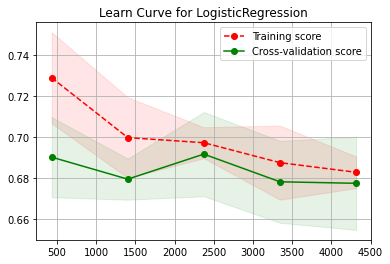

Function: evaluation_model Total Time Used: 2.079885721206665


In [117]:
logreg = m.train_logistic(train=True)
m.evaluation_model(logreg)

RandomForestClassifier: Score - 0.8585805084745762
Function: train_random_forest Total Time Used: 0.34357714653015137


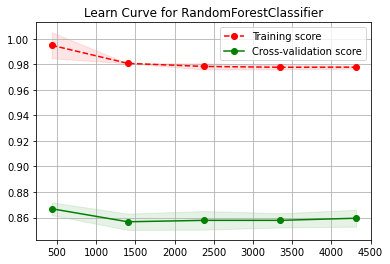

Function: evaluation_model Total Time Used: 10.890682697296143


In [118]:
rtd = m.train_random_forest(train=True)
m.evaluation_model(rtd)

DecisionTreeClassifier: Score - 0.8159427966101694
Function: train_decision_tree Total Time Used: 0.042021989822387695


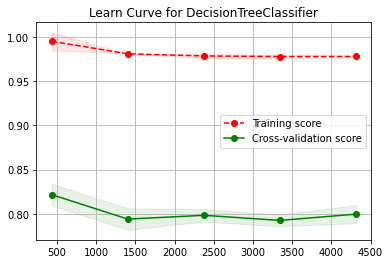

Function: evaluation_model Total Time Used: 1.4232571125030518


In [106]:
td = m.train_decision_tree(train=True)
m.evaluation_model(td)

Iteration 1, loss = 2.36230302
Validation score: 0.648148
Iteration 2, loss = 1.02506437
Validation score: 0.660494
Iteration 3, loss = 0.80624308
Validation score: 0.759259
Iteration 4, loss = 0.65071677
Validation score: 0.808642
Iteration 5, loss = 0.56399572
Validation score: 0.722222
Iteration 6, loss = 0.53036039
Validation score: 0.851852
Iteration 7, loss = 0.46866025
Validation score: 0.833333
Iteration 8, loss = 0.42154235
Validation score: 0.864198
Iteration 9, loss = 0.39450693
Validation score: 0.845679
Iteration 10, loss = 0.35855958
Validation score: 0.839506
Iteration 11, loss = 0.37228310
Validation score: 0.802469
Iteration 12, loss = 0.41240721
Validation score: 0.839506
Iteration 13, loss = 0.34569193
Validation score: 0.864198
Iteration 14, loss = 0.37336072
Validation score: 0.851852
Iteration 15, loss = 0.33714269
Validation score: 0.845679
Iteration 16, loss = 0.31306136
Validation score: 0.851852
Iteration 17, loss = 0.29847132
Validation score: 0.839506
Iterat

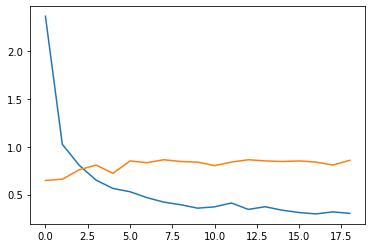

Function: train_mlp Total Time Used: 0.6086058616638184
Iteration 1, loss = 30.36062318
Validation score: 0.113636
Iteration 2, loss = 29.53210194
Validation score: 0.136364
Iteration 3, loss = 27.64260308
Validation score: 0.181818
Iteration 4, loss = 24.20615008
Validation score: 0.204545
Iteration 5, loss = 17.14679442
Validation score: 0.295455
Iteration 6, loss = 7.73854944
Validation score: 0.681818
Iteration 7, loss = 2.45309770
Validation score: 0.886364
Iteration 8, loss = 2.42096323
Validation score: 0.886364
Iteration 9, loss = 3.29169109
Validation score: 0.886364
Iteration 10, loss = 3.66290094
Validation score: 0.886364
Iteration 11, loss = 3.81935159
Validation score: 0.886364
Iteration 12, loss = 3.84575224
Validation score: 0.886364
Iteration 13, loss = 3.86581878
Validation score: 0.886364
Iteration 14, loss = 3.87224202
Validation score: 0.886364
Iteration 15, loss = 3.87388082
Validation score: 0.886364
Iteration 16, loss = 3.86700009
Validation score: 0.886364
Iter

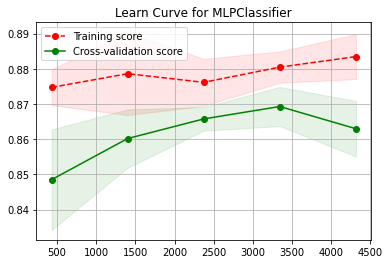

Function: evaluation_model Total Time Used: 8.151089906692505


In [107]:
mlp = m.train_mlp(train=1)
m.evaluation_model(mlp)

KNeighborsClassifier: Score - 0.8601694915254238


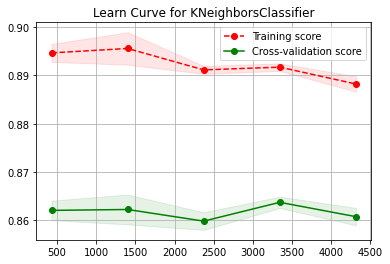

Function: evaluation_model Total Time Used: 7.244005918502808


In [108]:
knn = KNeighborsClassifier(n_neighbors=2)
m.train_model(knn)
m.evaluation_model(knn)

GaussianNB: Score - 0.574947033898305


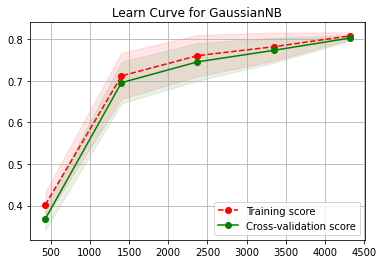

Function: evaluation_model Total Time Used: 1.0899741649627686


In [109]:
gn = GaussianNB()
m.train_model(gn)
m.evaluation_model(gn)

[1]	valid_0's l1: 0.225208	valid_0's binary_logloss: 0.372984
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.222114	valid_0's binary_logloss: 0.363547
[3]	valid_0's l1: 0.218634	valid_0's binary_logloss: 0.355235
[4]	valid_0's l1: 0.216124	valid_0's binary_logloss: 0.349977
[5]	valid_0's l1: 0.213508	valid_0's binary_logloss: 0.345877
[6]	valid_0's l1: 0.210955	valid_0's binary_logloss: 0.342585
[7]	valid_0's l1: 0.208566	valid_0's binary_logloss: 0.338913
[8]	valid_0's l1: 0.206194	valid_0's binary_logloss: 0.335834
[9]	valid_0's l1: 0.203797	valid_0's binary_logloss: 0.333353
[10]	valid_0's l1: 0.201712	valid_0's binary_logloss: 0.331034
[11]	valid_0's l1: 0.20017	valid_0's binary_logloss: 0.330567
[12]	valid_0's l1: 0.198314	valid_0's binary_logloss: 0.328869
[13]	valid_0's l1: 0.196933	valid_0's binary_logloss: 0.327853
[14]	valid_0's l1: 0.195372	valid_0's binary_logloss: 0.326962
[15]	valid_0's l1: 0.193719	valid_0's binary_logloss: 0.325945
[16]	

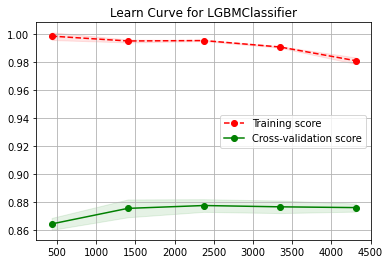

Function: evaluation_model Total Time Used: 4.820026159286499


In [110]:
import lightgbm as lgb
# m = Model(df)
# m.init_data_set(enable_pca=False)
gbm = lgb.LGBMClassifier()
gbm.fit(m.X_train, m.y_train,eval_set=[(m.X_test, m.y_test)],eval_metric='l1',early_stopping_rounds=5)
m.evaluation_model(gbm)

[13:26:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[13:26:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


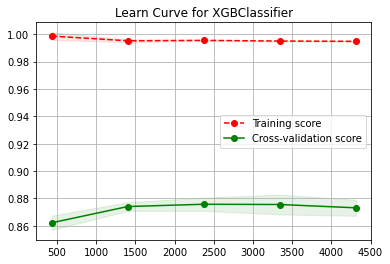

Function: evaluation_model Total Time Used: 14.72298002243042


In [111]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(m.X_train,
          m.y_train)
m.evaluation_model(xgb)

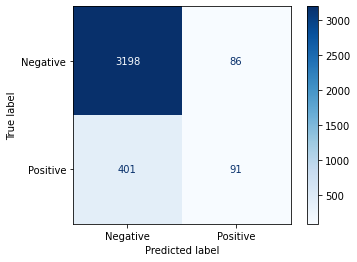

In [112]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc, average_precision_score, precision_recall_curve


plot_confusion_matrix(xgb, m.X_test, m.y_test, display_labels=["Negative", "Positive"], cmap=plt.cm.Blues, normalize=None)

In [113]:
models = [rtd, knn, td, gn, mlp, logreg, gbm, xgb]
fpr = {}
tpr = {}
roc_auc = {}

for model in models:
  _class_name = model.__class__.__name__
  fpr[_class_name], tpr[_class_name], _ = metrics.roc_curve(m.y_test, model.predict_proba(m.X_test)[:,1])
  roc_auc[_class_name] = auc(fpr[_class_name], tpr[_class_name])




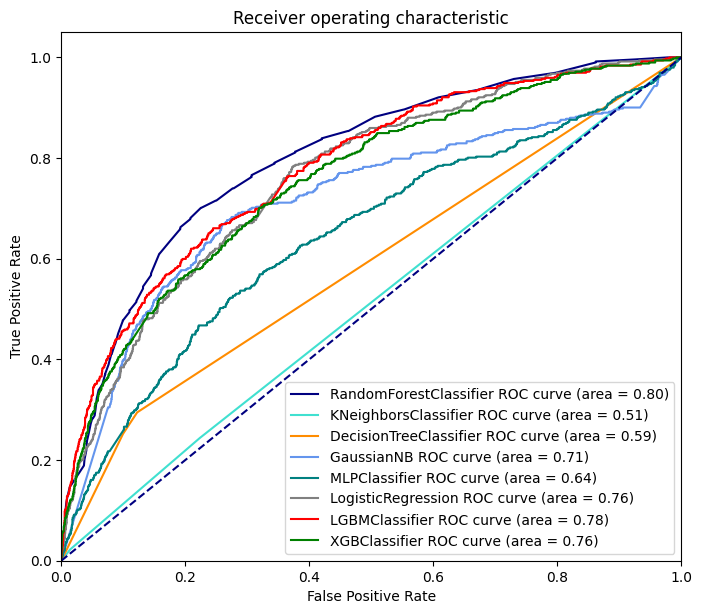

In [114]:
from itertools import cycle

plt.figure(figsize=(8,7), dpi=100)
lw = 1.5
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'gray', 'red', 'green'])

for model, color in zip(models, colors):
  _class_name = model.__class__.__name__
  plt.plot(fpr[_class_name], tpr[_class_name], color=color,
         lw=lw, label='%s ROC curve (area = %0.2f)' % (_class_name, roc_auc[_class_name]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

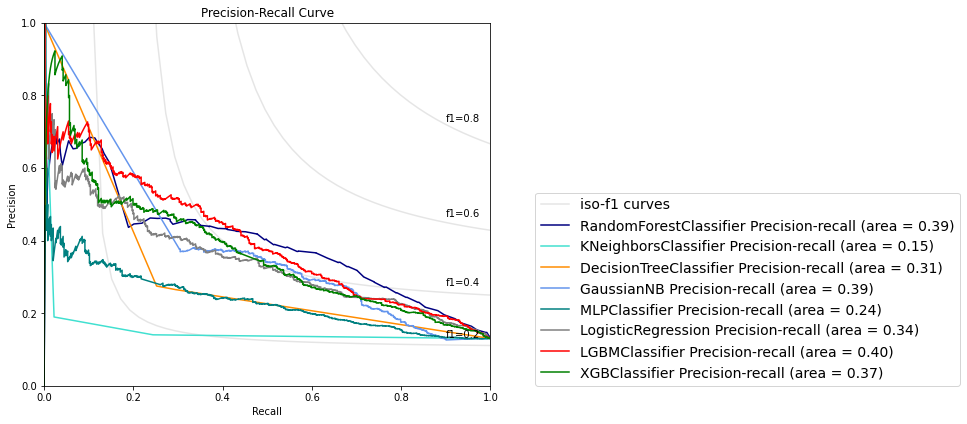

In [115]:

plt.figure(figsize=(8, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')


for model, color in zip(models, colors):
    y_score = model.predict_proba(m.X_test)[:,1]
    precision, recall, _ = precision_recall_curve(m.y_test, y_score)
    average_precision = auc(recall, precision)
    l, = plt.plot(recall, precision, color=color, lw=lw)
    lines.append(l)
    labels.append('{0} Precision-recall (area = {1:0.2f})'
                  ''.format(model.__class__.__name__, average_precision))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(lines, labels, loc=(1.1, 0), prop=dict(size=14))


plt.show()


feature DLQ050_1.0 (0.109716)
feature WHD020_RE (0.068772)
feature CBD070_RE (0.067209)
feature INDFMMPI_RE (0.065406)
feature HUQ010_4 (0.059888)
feature WHD010_RE (0.050555)
feature SLQ050_2.0 (0.048055)
feature HUQ010_5 (0.034372)
feature CBD090_RE (0.032913)
feature ALQ120Q_RE (0.027529)
feature SLD010H_RE (0.022205)
feature SMD030_RE (0.021145)
feature PAQ710_RE (0.020311)
feature ALQ101_2.0 (0.019329)
feature WHD050_RE (0.018479)
feature DBD895_RE (0.018255)
feature HUQ051_3 (0.017209)
feature HUQ051_1 (0.016418)
feature CBD110_RE (0.015720)
feature RHD190_RE (0.014155)


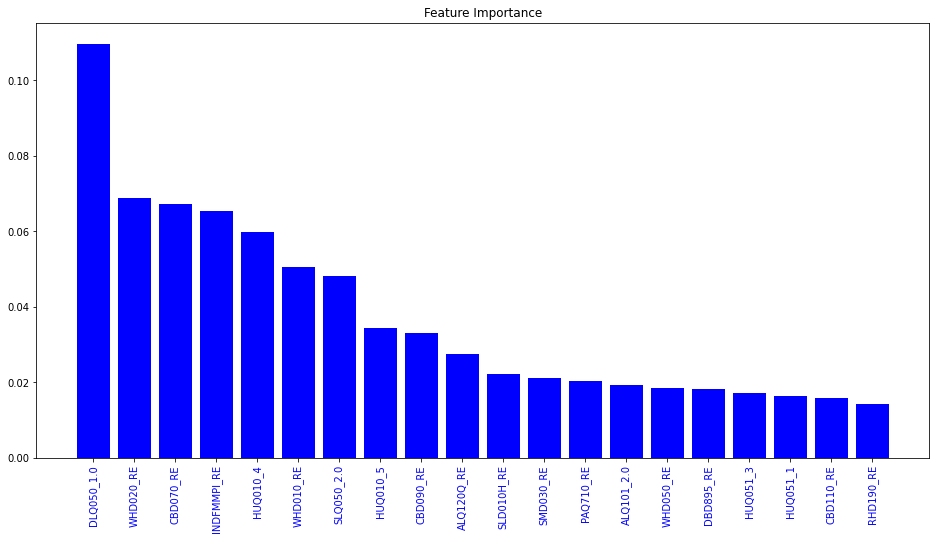

Function: feature_importance Total Time Used: 0.2600681781768799


In [92]:
m.feature_importance(td, showGraph=True)

In [93]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

def fold_test():
    folder = KFold(n_splits=20)
    td = MLPRegressor(hidden_layer_sizes=(6,2),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
        learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=5000, shuffle=True,
        random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
        early_stopping=True,beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    td = DecisionTreeRegressor()
    td.fit(m.X_train, m.y_train)

    for (trn_idx, val_idx) in folder.split(m.X, m.y):
        train, val = m.df.iloc[trn_idx], m.df.iloc[val_idx]
        train_X = train.iloc[:, 1:]
        train_y = train.iloc[:, 0]
        val_X = val.iloc[:, 1:]
        val_y = val.iloc[:, 0]
        #print(len(train_y))
        #td.fit(train_X, train_y)
        print(f"{td.__class__.__name__}: Score - {metrics.mean_absolute_error(val_y,td.predict(val_X))}")


fold_test()


DecisionTreeRegressor: Score - 0.15185185185185185
DecisionTreeRegressor: Score - 0.13440860215053763
DecisionTreeRegressor: Score - 0.14635603345280765
DecisionTreeRegressor: Score - 0.17335722819593788
DecisionTreeRegressor: Score - 0.12329749103942651
DecisionTreeRegressor: Score - 0.15842293906810034
DecisionTreeRegressor: Score - 0.16487455197132617
DecisionTreeRegressor: Score - 0.12329749103942651
DecisionTreeRegressor: Score - 0.12520908004778972
DecisionTreeRegressor: Score - 0.13249701314217444
DecisionTreeRegressor: Score - 0.12222222222222222
DecisionTreeRegressor: Score - 0.14289127837514934
DecisionTreeRegressor: Score - 0.16977299880525687
DecisionTreeRegressor: Score - 0.10888595754886676
DecisionTreeRegressor: Score - 0.1313107087180717
DecisionTreeRegressor: Score - 0.11344285885597793
DecisionTreeRegressor: Score - 0.12483511212375584
DecisionTreeRegressor: Score - 0.13394891473797818
DecisionTreeRegressor: Score - 0.13023144261901906
DecisionTreeRegressor: Score - 0

In [ ]:
import imp
imp.reload(model)
imp.reload(health_data)
from model import Model

In [ ]:
testdf = df[['SUM','DPQ010', 'DPQ020',	'DPQ030',	'DPQ040',	'DPQ050',	'DPQ060',	'DPQ070',	'DPQ080',	'DPQ090', "DPQ100"]]

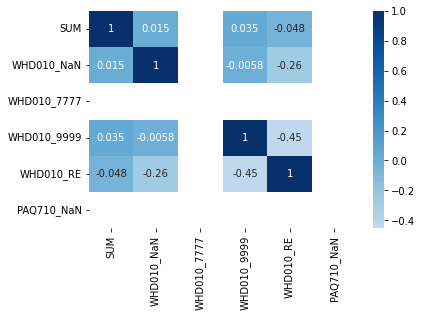

In [ ]:
# corr = pd.merge(df_range_encoding.iloc[:,0], df_range_encoding.iloc[:,5:10], left_index=True, right_index=True).corr()
df.corrwith()
# mask = np.zeros_like(corr)
# mask[np.tril_indices_from(mask)] = True
sns.heatmap(corr, center=0, annot=True, cmap='Blues')
plt.savefig("corr.png")



In [ ]:
df.drop(['SEQN','DPQ010', 'DPQ020',	'DPQ030',	'DPQ040',	'DPQ050',	'DPQ060',	'DPQ070',	'DPQ080',	'DPQ090', "DPQ100"], axis=1).corr()["SUM"].sort_values().dropna()

SLQ050       -0.195641
PFQ049       -0.187978
PFQ051       -0.187976
DLQ040       -0.157608
DLQ050       -0.153189
INDFMPIR     -0.142841
INDFMMPI     -0.137222
CDQ010       -0.129073
PFQ057       -0.109620
CSQ202       -0.107448
OHQ620       -0.098729
OHQ680       -0.097046
PFQ054       -0.091179
DLQ080       -0.086795
FSQ165       -0.082277
OHQ770       -0.081707
MCQ160A      -0.081644
MCQ365B      -0.077958
FSD032A      -0.077956
FSD032C      -0.072455
DMDEDUC2     -0.071798
CDQ001       -0.069437
WHQ030       -0.069118
INDFMMPC     -0.068329
MCQ080       -0.066822
BPQ020       -0.066417
FSD032B      -0.064154
MCQ365D      -0.059901
MCQ365A      -0.059595
DMDHREDU     -0.057998
SMQ020       -0.053520
SMDANY       -0.053020
MCQ365C      -0.051875
SMQ681       -0.051498
PFQ090       -0.049625
INDHHIN2     -0.044527
HUQ090       -0.042994
SMQ050Q      -0.040675
SXD171       -0.038694
IND235       -0.037125
INDFMIN2     -0.035896
CSQ204       -0.034411
OHQ865       -0.034124
OHQ870     

In [ ]:
df.drop(['SEQN','DPQ010', 'DPQ020',	'DPQ030',	'DPQ040',	'DPQ050',	'DPQ060',	'DPQ070',	'DPQ080',	'DPQ090', "DPQ100"], axis=1).corr()["SUM"].sort_values(ascending=False).dropna()

SUM           1.000000
PFQ061N       0.396682
HSD010        0.384474
HUQ010        0.372533
PFQ061M       0.368757
PFQ061J       0.360933
PFQ061Q       0.350692
PFQ061D       0.342481
MCQ380        0.336515
PFQ061T       0.334067
PFQ061S       0.332812
PFQ061E       0.332321
PFQ061I       0.331427
PFQ061L       0.331367
PFQ061R       0.329362
PFQ061O       0.320568
PFQ061F       0.301454
PFQ061P       0.296282
SMQ690A       0.288184
PFQ061H       0.278106
PFQ061B       0.273387
WHQ060        0.272406
HIQ031B       0.270277
PFQ061K       0.268850
OCQ380        0.261006
SMD641        0.255900
SMQ710        0.250512
PFQ061A       0.249416
RIDEXPRG      0.236137
DBQ700        0.234022
WHD080A       0.228567
FSDAD         0.224243
OHQ845        0.222845
FSDHH         0.221399
OCD150        0.216202
WHD080D       0.214751
PFQ061C       0.214582
CSQ180        0.212264
DIQ175A       0.211934
SMQ050U       0.211646
PFQ061G       0.201869
DBQ330        0.201708
OHQ895        0.199126
BPQ050A    

In [124]:
df.columns.to_list()

['SUM',
 'SDDSRVYR',
 'RIDSTATR',
 'RIAGENDR',
 'RIDAGEYR',
 'RIDRETH1',
 'RIDRETH3',
 'RIDEXMON',
 'DMQMILIZ',
 'DMDBORN4',
 'DMDCITZN',
 'DMDYRSUS',
 'DMDEDUC2',
 'DMDMARTL',
 'RIDEXPRG',
 'SIALANG',
 'SIAPROXY',
 'SIAINTRP',
 'FIALANG',
 'FIAPROXY',
 'FIAINTRP',
 'MIALANG',
 'MIAPROXY',
 'MIAINTRP',
 'AIALANGA',
 'DMDHHSIZ',
 'DMDFMSIZ',
 'DMDHHSZA',
 'DMDHHSZB',
 'DMDHHSZE',
 'DMDHRGND',
 'DMDHRAGE',
 'DMDHRBR4',
 'DMDHREDU',
 'DMDHRMAR',
 'DMDHSEDU',
 'WTINT2YR',
 'WTMEC2YR',
 'SDMVPSU',
 'SDMVSTRA',
 'INDHHIN2',
 'INDFMIN2',
 'INDFMPIR',
 'ACD011A',
 'ACD040',
 'ALQ101',
 'ALQ110',
 'ALQ120Q',
 'ALQ120U',
 'ALQ130',
 'ALQ141Q',
 'ALQ141U',
 'ALQ151',
 'ALQ160',
 'BPQ020',
 'BPQ030',
 'BPD035',
 'BPQ040A',
 'BPQ050A',
 'BPQ056',
 'BPD058',
 'BPQ059',
 'BPQ080',
 'BPQ060',
 'BPQ070',
 'BPQ090D',
 'BPQ100D',
 'CBD070',
 'CBD090',
 'CBD110',
 'CBD120',
 'CBD130',
 'HSD010',
 'HSQ500',
 'HSQ510',
 'HSQ520',
 'HSQ571',
 'HSQ590',
 'HSAQUEX',
 'CSQ010',
 'CSQ020',
 'CSQ030',
 'CSQ040',
